# Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

import pickle

import warnings
warnings.filterwarnings("ignore")

sns.set()

# Importing Dataset

In [2]:
train_features_backup = pd.read_csv("../Data/train_features_df.csv")
test_features_backup = pd.read_csv("../Data/test_features_df.csv")

train_features_df = train_features_backup.copy()
test_features_df = test_features_backup.copy()

In [3]:
train_df = pd.read_csv("../Data/train.csv")
test_df = pd.read_csv("../Data/test.csv")

train_preprocessed_df = pd.read_csv("../Data/preprocessed_train_df.csv")
test_preprocessed_df = pd.read_csv("../Data/preprocessed_test_df.csv")

# Train Test Split

In [4]:
train_features_df["Indices"] = train_features_df.index

In [5]:
X, y = train_features_df.drop(["Age_label_enc", "Fare_label_enc"], axis = 1).values, train_df["Survived"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Base Logistic Regression Model

In [6]:
base_lr = LogisticRegression(random_state = 42)
base_lr_fit = base_lr.fit(X_train[:, :-1], y_train)

## Classificaton Accuracy

In [7]:
np.where(base_lr_fit.predict(X_test[:, :-1]) == y_test, 1, 0).mean()

0.8100558659217877

## F1 Score

In [8]:
f1_score(y_true = y_test, y_pred = base_lr_fit.predict(X_test[:, :-1]))

0.7671232876712328

## Classification Summary

In [9]:
preds = base_lr_fit.predict(X_test[:, :-1])

f1_df = pd.DataFrame(index = ["Predictions:0", "Predictions:1"], columns = ["Actuals:0", "Actuals:1"])

f1_df.at["Predictions:0", "Actuals:0"] = np.where((preds == 0) & (y_test == 0), 1, 0).sum()
f1_df.at["Predictions:0", "Actuals:1"] = np.where((preds == 0) & (y_test == 1), 1, 0).sum()
f1_df.at["Predictions:1", "Actuals:0"] = np.where((preds == 1) & (y_test == 0), 1, 0).sum()
f1_df.at["Predictions:1", "Actuals:1"] = np.where((preds == 1) & (y_test == 1), 1, 0).sum()

f1_df

,Actuals:0,Actuals:1
Predictions:0,89,18
Predictions:1,16,56


## Error Analysis

In [10]:
preds = base_lr_fit.predict(X_test[:, :-1])

p0_a1 = X_test[:, -1][(preds == 0) & (y_test == 1)]
p1_a0 = X_test[:, -1][(preds == 1) & (y_test == 0)]

In [11]:
base_lr_fit.classes_

array([0, 1], dtype=int64)

In [12]:
preds_proba = base_lr_fit.predict_proba(X_test[:, :-1])

error_df = pd.concat([train_df.loc[p0_a1], train_df.loc[p1_a0]], axis = 0)
error_df["Prediction_Proba"] = preds_proba[:, 1][((preds == 0) & (y_test == 1)) | ((preds == 1) & (y_test == 0))]

error_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prediction_Proba
621.0,622,1,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S,0.301741
447.0,448,1,1,"Seward, Mr. Frederic Kimber",male,34.0,0,0,113794,26.5500,NaN,S,0.219224
673.0,674,1,2,"Wilhelms, Mr. Charles",male,31.0,0,0,244270,13.0000,NaN,S,0.525590
204.0,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.0,0,0,A/5 3540,8.0500,NaN,S,0.197066
23.0,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,0.523634
165.0,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,363291,20.5250,NaN,S,0.576543
712.0,713,1,1,"Taylor, Mr. Elmer Zebley",male,48.0,1,0,19996,52.0000,C126,S,0.095300
338.0,339,1,3,"Dahl, Mr. Karl Edwart",male,45.0,0,0,7598,8.0500,NaN,S,0.287643
286.0,287,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,345774,9.5000,NaN,S,0.735364
209.0,210,1,1,"Blank, Mr. Henry",male,40.0,0,0,112277,31.0000,A31,C,0.929229


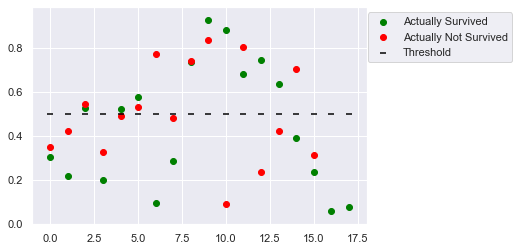

In [13]:
sur_arr = error_df[error_df["Survived"] == 1]["Prediction_Proba"]
die_arr = error_df[error_df["Survived"] == 0]["Prediction_Proba"]

plt.scatter(np.arange(0, sur_arr.shape[0]), sur_arr, color = "green", label = "Actually Survived")
plt.scatter(np.arange(0, die_arr.shape[0]), die_arr, color = "red", label = "Actually Not Survived")
plt.scatter(np.arange(0, max(sur_arr.shape[0], die_arr.shape[0])), [0.5]*max(sur_arr.shape[0], die_arr.shape[0]), color = "black", marker = "_", label = "Threshold")

plt.legend(bbox_to_anchor=(1.45, 1))
plt.show()

# Optimizing Logistic Regression

## Base Model Definition

In [14]:
log_reg_model = LogisticRegression()

## Parameter Grid

In [15]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

## Building Grid Search Object

In [16]:
all_log_reg_models = GridSearchCV(log_reg_model, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

## Fitting the Models

In [17]:
all_log_reg_models_fit = all_log_reg_models.fit(X_train[:, :-1], y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1556 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 2724 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 4124 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 4793 out of 4800 | elapsed:  1.8min remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:  1.9min finished


## Best Model

In [18]:
best_model = all_log_reg_models_fit.best_estimator_
best_model

LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Best Model Performance

#### Classification Accuracy

In [19]:
np.where(best_model.predict(X_test[:, :-1]) == y_test, 1, 0).mean()

0.8100558659217877

#### F1 Score

In [20]:
f1_score(y_true = y_test, y_pred = best_model.predict(X_test[:, :-1]))

0.7671232876712328

# Submission File

## Fitting Best Model on Full Data

### Data

In [21]:
X, y = train_features_df.drop(["Age_label_enc", "Fare_label_enc"], axis = 1), train_preprocessed_df["Survived"]

### Training all Models

In [22]:
final_fit = all_log_reg_models.fit(X.values[:, :-1], y.values)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 344 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 1496 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 2364 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-1)]: Done 3464 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:  2.3min finished


### Selecting the Best Model

In [23]:
final_best_model = final_fit.best_estimator_
final_best_model

LogisticRegression(C=29.763514416313132, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Exporting Model

In [24]:
filename = "logistic_regression_model.sav"
pickle.dump(final_best_model, open(filename, 'wb'))

### Checking Exported Model

In [25]:
filename = "logistic_regression_model.sav"
loaded_model = pickle.load(open(filename, 'rb'))

In [26]:
loaded_model

LogisticRegression(C=29.763514416313132, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Adding Predictions to Submission File

In [27]:
test_data = test_features_df.drop(["Age_label_enc", "Fare_mean_enc"], axis = 1).values

In [28]:
sub2 = pd.read_csv("../Data/gender_submission.csv")
sub2["Survived"] = final_best_model.predict(test_data)
sub2.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [29]:
sub2.to_csv("sub2_logistic_regression.csv", index = False)